In [2]:
import pandas as pd
import re 
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import zscore
import seaborn as sns
import folium
from folium.plugins import HeatMap



In [ ]:
def validate_mac_address(df):
    """validate all the mac addresses are in correct format"""
    mac_regex = re.compile(r'^([0-9A-Fa-f]{2}([-:]?)){5}[0-9A-Fa-f]{2}$')

    # Check each MAC address
    invalid_macs = [mac for mac in list(df.MAC) if not mac_regex.match(mac)]

    if invalid_macs:
        print("Invalid MAC addresses found:")
        print(invalid_macs)
        return  invalid_macs
    else:
        print("All MAC addresses are valid!")
        return True

In [ ]:
def standardize_auth_mode(auth_mode):
    """Standardize the Common Modes and Remove Unnecessary Details"""
    # Simplify the WPA modes (WPA2, WPA, RSN, etc.)
    if 'WPA2' in auth_mode or 'WPA' in auth_mode:
        auth_mode = 'WPA2/WPA-PSK'  # Combine WPA2 and WPA-PSK modes
    
    # Remove any encryption types (CCMP, TKIP, GCMP, etc.) and simplify
    auth_mode = re.sub(r'(CCMP|TKIP|GCMP)', '', auth_mode)
    
    # Remove any unnecessary tags (e.g., [RSN], [WPS], [MFPC])
    auth_mode = re.sub(r'(\[.*?\])', '', auth_mode)
    
    # Normalize device types and other identifiers
    auth_mode = re.sub(r';\d+', '', auth_mode)  # Remove any ';<number>' suffixes
    
    # If the mode is only 'ESS' or similar, we keep it simple
    if 'ESS' in auth_mode:
        auth_mode = 'ESS'
    
    # Return the normalized auth mode
    return auth_mode.strip()

In [ ]:

def validate_datetime_format(date_str):
    """Function to validate the date-time format"""

    try:
        # Try parsing the string into the expected format
        datetime.strptime(date_str, "%m/%d/%Y %H:%M")
        return True
    except ValueError:
        # If parsing fails, it's not in the correct format
        return False

In [ ]:
def make_bar_chart(data, title_text):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar',color='skyblue', edgecolor='black')
    plt.title(title_text)
    plt.xticks(rotation=45)
    plt.show()
    

MAIN

In [ ]:
df=pd.read_csv("data/WigleWifi_20250108114246.csv")
df

,MAC,SSID,AuthMode,FirstSeen,Channel,Frequency,RSSI,CurrentLatitude,CurrentLongitude,AltitudeMeters,AccuracyMeters,RCOIs,MfgrId,Type
0,70:ee:3e:3d:72:df,NaN,Misc,1/7/2025 6:10,NaN,NaN,-66,13.716067,100.589704,-19.9,16.615999,NaN,76.0,BLE
1,13:f2:97:8f:6e:6e,NaN,Misc,1/7/2025 6:10,NaN,NaN,-80,13.716067,100.589704,-19.9,16.615999,NaN,6.0,BLE
2,22:61:2e:e5:44:18,NaN,Misc,1/7/2025 6:10,NaN,NaN,-88,13.716067,100.589704,-19.9,16.615999,NaN,6.0,BLE
3,71:11:b1:c7:05:a1,NaN,Misc,1/7/2025 6:10,NaN,NaN,-90,13.716067,100.589704,-19.9,16.615999,NaN,76.0,BLE
4,5e:ca:ba:0f:b9:90,NaN,Misc,1/7/2025 6:10,NaN,NaN,-48,13.716067,100.589704,-19.9,16.615999,NaN,76.0,BLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132071,22:08:89:7b:52:78,NaN,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/8/2025 4:42,5.0,2432.0,-93,13.712628,100.594042,3.1,27.188000,NaN,NaN,WIFI
132072,e8:1d:a8:0e:6a:18,NaN,[WPA2-PSK-CCMP+TKIP][RSN-PSK-CCMP+TKIP][ESS],1/8/2025 4:42,1.0,2412.0,-92,13.712628,100.594042,3.1,27.188000,NaN,NaN,WIFI
132073,62:af:97:28:19:ea,Nidhra-WiFi,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/8/2025 4:42,1.0,2412.0,-92,13.712628,100.594042,3.1,27.188000,NaN,NaN,WIFI
132074,cc:2d:21:ab:cc:a4,NaN,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/8/2025 4:42,3.0,2422.0,-89,13.712628,100.594042,3.1,27.188000,NaN,NaN,WIFI


In [ ]:
df.columns

Index(['MAC', 'SSID', 'AuthMode', 'FirstSeen', 'Channel', 'Frequency', 'RSSI',
       'CurrentLatitude', 'CurrentLongitude', 'AltitudeMeters',
       'AccuracyMeters', 'RCOIs', 'MfgrId', 'Type'],
      dtype='object')

null count for each col


null values count per col

 MAC                      0
SSID                 38814
AuthMode                 0
FirstSeen                0
Channel               7868
Frequency             4025
RSSI                     0
CurrentLatitude          0
CurrentLongitude         0
AltitudeMeters           0
AccuracyMeters           0
RCOIs               132076
MfgrId              128052
Type                     0
dtype: int64


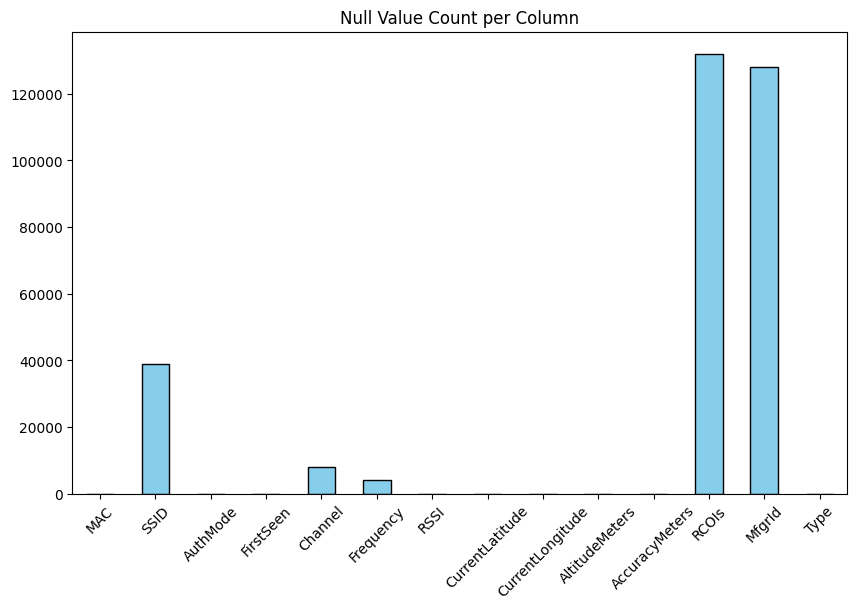

In [ ]:
pre_null_counts = df.isnull().sum()
print(f'null values count per col\n\n {pre_null_counts}')

make_bar_chart(pre_null_counts,'Null Value Count per Column')



Count of Duplicate Rows 

In [ ]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


Describe numeric cols 

In [ ]:
numeric_summary = df.describe()
print(numeric_summary)

             Channel      Frequency           RSSI  CurrentLatitude  \
count  124208.000000  128051.000000  132076.000000    132076.000000   
mean       77.760072    5099.184598     -83.095506        13.723269   
std        53.234774    1141.408974      10.632162         0.009286   
min         1.000000     260.000000    -100.000000        13.699824   
25%        40.000000    5200.000000     -91.000000        13.715940   
50%        52.000000    5260.000000     -86.000000        13.721750   
75%       149.000000    5745.000000     -77.000000        13.730723   
max       165.000000    7936.000000       0.000000        13.742556   

       CurrentLongitude  AltitudeMeters  AccuracyMeters  RCOIs       MfgrId  
count     132076.000000   132076.000000   132076.000000    0.0  4024.000000  
mean         100.569637      -20.194086        2.203698    NaN    58.500000  
std            0.011092       22.349397        3.020353    NaN    30.314656  
min          100.550796      -41.200000        0

each col uniques 

Distribution of Unique Values in Each Column 

MAC                 69488
SSID                31205
AuthMode              131
FirstSeen             259
Channel                38
Frequency              60
RSSI                   71
CurrentLatitude      7712
CurrentLongitude     7463
AltitudeMeters        572
AccuracyMeters         85
RCOIs                   0
MfgrId                  2
Type                    3
dtype: int64


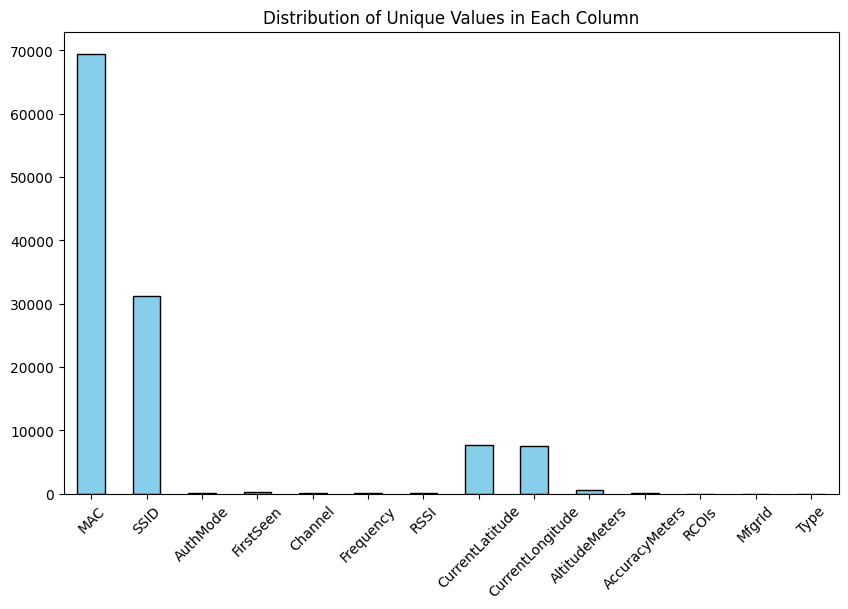

In [ ]:
unique_counts = df.nunique()
print (f'Distribution of Unique Values in Each Column \n\n{unique_counts}')
# Plotting the distribution of unique values
make_bar_chart(unique_counts,'Distribution of Unique Values in Each Column')



unique values and counts for non numeric col's values

In [ ]:
non_numeric_df = df.select_dtypes(exclude=['number'])
# Specify the list of columns
columns_to_check = ['MAC',	'SSID',	'AuthMode','Channel',	'Frequency',	'RSSI', 	'MfgrId',	'Type']

# Get unique values and counts for the specified columns
for col in columns_to_check:
    print(f"Unique values and their counts for column '{col}':")
    print(df[col].value_counts())
    print("-" * 50)

Unique values and their counts for column 'MAC':
MAC
70:ee:3e:3d:72:df    503
22:61:2e:e5:44:18    503
71:11:b1:c7:05:a1    503
5e:ca:ba:0f:b9:90    503
40:6b:e5:1a:8c:95    503
                    ... 
54:f0:b1:97:98:50      1
b4:b0:24:f2:2e:e4      1
64:20:e0:fd:af:25      1
54:f0:b1:97:69:b0      1
66:20:e1:12:54:3e      1
Name: count, Length: 69488, dtype: int64
--------------------------------------------------
Unique values and their counts for column 'SSID':
SSID
MarriottBonvoy             1154
.@ AIS SUPER WiFi           470
  AIS SMART Login           468
privatezone                 398
Shama Sukhumvit Bangkok     372
                           ... 
Auguston2025                  1
SPACE OBJEKT_2.4G             1
sweet_home_5G                 1
TTU                           1
suzuki236_2.4G                1
Name: count, Length: 31205, dtype: int64
--------------------------------------------------
Unique values and their counts for column 'AuthMode':
AuthMode
[WPA2-PSK-CCMP][RS

Check Skewness

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate skewness for numeric columns
skewness = numeric_df.skew()

print("Skewness of each numeric column:")
print(skewness)

Skewness of each numeric column:
Channel              0.400128
Frequency           -1.610722
RSSI                 1.024090
CurrentLatitude      0.251694
CurrentLongitude     0.438379
AltitudeMeters      38.530771
AccuracyMeters      84.581583
RCOIs                     NaN
MfgrId              -1.155131
dtype: float64


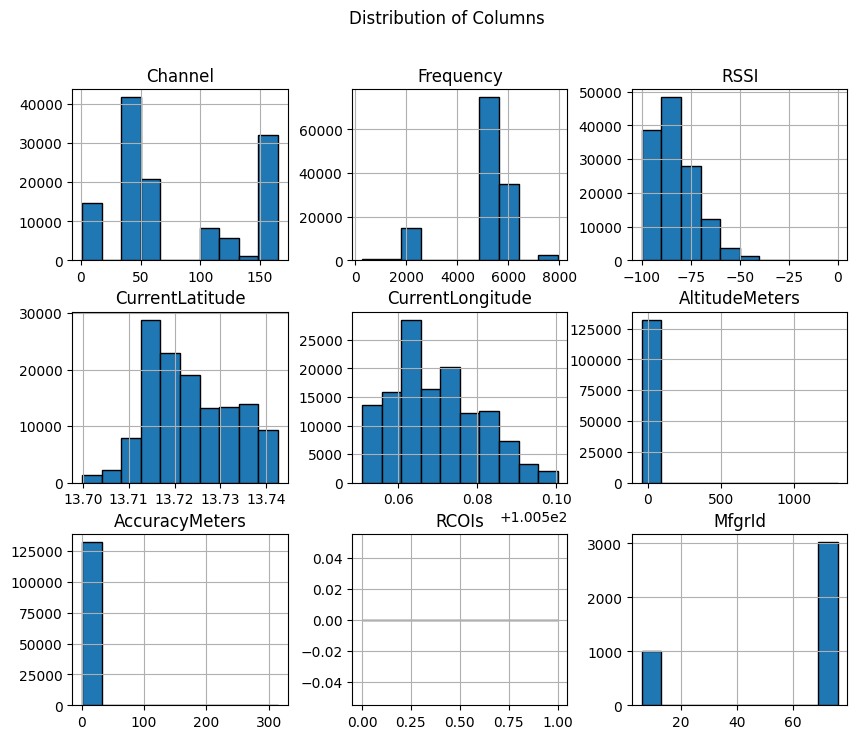

In [ ]:
# Plot histograms for numeric columns
df.hist(figsize=(10, 8), bins=10, edgecolor='black')
plt.suptitle('Distribution of Columns')
plt.show()

 Identifying Outliers


In [ ]:
# Z-score method to detect outliers
df['Altitude_zscore'] = zscore(df['AltitudeMeters'])
df['Accuracy_zscore'] = zscore(df['AccuracyMeters'])
df['Frequency_zscore'] = zscore(df['Frequency'])
df['CurrentLatitude_zscore'] = zscore(df['CurrentLatitude'])
df['CurrentLongitude_zscore'] = zscore(df['CurrentLongitude'])
df['Channel_zscore'] = zscore(df['Channel'])
df['RSSI_zscore'] = zscore(df['RSSI'])

# Find outliers (Z-score greater than 3 or less than -3)
altitude_outliers = df[df['Altitude_zscore'].abs() > 3]
accuracy_outliers = df[df['Accuracy_zscore'].abs() > 3]
frequency_outliers = df[df['Frequency_zscore'].abs() > 3]
latitude_outliers = df[df['CurrentLatitude_zscore'].abs() > 3]
longitude_outliers = df[df['CurrentLongitude_zscore'].abs() > 3]
channel_outliers = df[df['Channel_zscore'].abs() > 3]
rssi_outliers = df[df['RSSI_zscore'].abs() > 3]


print(f"Altitude outliers: {altitude_outliers[['AltitudeMeters']]}")
print(f"Accuracy outliers: {accuracy_outliers[['AccuracyMeters']]}")
print(f"Frequency outliers: {frequency_outliers[['Frequency']]}")
print(f"Latitude outliers: {latitude_outliers[['CurrentLatitude']]}")
print(f"Longitude outliers: {longitude_outliers[['CurrentLongitude']]}")
print(f"channel outliers: {channel_outliers[['Channel']]}")
print(f"RSSI outliers: {rssi_outliers[['RSSI']]}")


Altitude outliers:         AltitudeMeters
323        1299.700000
324        1299.700000
325        1299.700000
326        1299.700000
327        1299.700000
...                ...
132055       48.200001
132056       48.200001
132057       48.200001
132058       48.200001
132070       48.200001

[91 rows x 1 columns]
Accuracy outliers:         AccuracyMeters
0            16.615999
1            16.615999
2            16.615999
3            16.615999
4            16.615999
...                ...
132071       27.188000
132072       27.188000
132073       27.188000
132074       27.188000
132075       18.122999

[564 rows x 1 columns]
Frequency outliers: Empty DataFrame
Columns: [Frequency]
Index: []
Latitude outliers: Empty DataFrame
Columns: [CurrentLatitude]
Index: []
Longitude outliers: Empty DataFrame
Columns: [CurrentLongitude]
Index: []
channel outliers: Empty DataFrame
Columns: [Channel]
Index: []
RSSI outliers:         RSSI
4        -48
151      -51
158      -50
244      -39
266    

CLEANING & Validating


In [ ]:
# droping rows for null values for Channel & Frequency  
df_clean=df.copy()
df_clean.dropna(subset=['Frequency','Channel'], inplace=True)
# droping RCOIs and MFgrId col because it has more than 95% null values 
df_clean.drop(columns=['MfgrId', 'RCOIs'], inplace=True)
df_clean


,MAC,SSID,AuthMode,FirstSeen,Channel,Frequency,RSSI,CurrentLatitude,CurrentLongitude,AltitudeMeters,AccuracyMeters,Type,Altitude_zscore,Accuracy_zscore,Frequency_zscore,CurrentLatitude_zscore,CurrentLongitude_zscore,Channel_zscore,RSSI_zscore
8,66:20:e1:a7:9a:a5,Niku Niku_5G,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS][WPS],1/7/2025 6:10,40.0,5200.0,-84,13.716067,100.589704,-19.9,16.615999,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,-0.085072
9,74:19:f8:e4:d8:b8,whats on your mind 5G,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/7/2025 6:10,157.0,5785.0,-80,13.716067,100.589704,-19.9,16.615999,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,0.291147
10,18:e8:29:9e:fd:6f,whats on your mind 5G,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/7/2025 6:10,40.0,5200.0,-95,13.716067,100.589704,-19.9,16.615999,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,-1.119672
11,a8:42:a1:9f:19:f3,Niku Niku@FoodStory,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/7/2025 6:10,149.0,5745.0,-91,13.716067,100.589704,-19.9,16.615999,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,-0.743454
12,76:e9:bf:42:13:cc,wipata_5G,[WPA2-PSK-CCMP+TKIP][RSN-PSK-CCMP+TKIP][WPA-PS...,1/7/2025 6:10,36.0,5180.0,-88,13.716067,100.589704,-19.9,16.615999,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,-0.461290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132071,22:08:89:7b:52:78,NaN,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/8/2025 4:42,5.0,2432.0,-93,13.712628,100.594042,3.1,27.188000,WIFI,1.042273,8.272011,NaN,-1.145957,2.200287,NaN,-0.931563
132072,e8:1d:a8:0e:6a:18,NaN,[WPA2-PSK-CCMP+TKIP][RSN-PSK-CCMP+TKIP][ESS],1/8/2025 4:42,1.0,2412.0,-92,13.712628,100.594042,3.1,27.188000,WIFI,1.042273,8.272011,NaN,-1.145957,2.200287,NaN,-0.837509
132073,62:af:97:28:19:ea,Nidhra-WiFi,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/8/2025 4:42,1.0,2412.0,-92,13.712628,100.594042,3.1,27.188000,WIFI,1.042273,8.272011,NaN,-1.145957,2.200287,NaN,-0.837509
132074,cc:2d:21:ab:cc:a4,NaN,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/8/2025 4:42,3.0,2422.0,-89,13.712628,100.594042,3.1,27.188000,WIFI,1.042273,8.272011,NaN,-1.145957,2.200287,NaN,-0.555345


In [ ]:
# Validate the 'FirstSeen' column  and identify invalid rows
invalid_rows = df_clean[~df_clean['FirstSeen'].apply(validate_datetime_format)]
if invalid_rows.empty:
    print("All values in the 'FirstSeen' column are in the correct date-time format.")
else:
    print(f"Found {len(invalid_rows)} invalid rows in the 'FirstSeen' column.")
    print(invalid_rows[['FirstSeen']])

All values in the 'FirstSeen' column are in the correct date-time format.


In [ ]:
#validate mac address
validate_mac_address(df_clean)
# fill SSID for null values
df_clean['SSID'].fillna('Unknown_SSID', inplace=True)


# Apply the normalization function to the 'AuthMode' column
df_clean['NormalizedAuthMode'] = df_clean['AuthMode'].apply(standardize_auth_mode)
# Fill empty or null entries with a placeholder (e.g., 'Unknown')
df_clean['NormalizedAuthMode'] = df_clean['NormalizedAuthMode'].replace(['', None], 'Unknown')

df_clean

All MAC addresses are valid!


,MAC,SSID,AuthMode,FirstSeen,Channel,Frequency,RSSI,CurrentLatitude,CurrentLongitude,AltitudeMeters,AccuracyMeters,Type,Altitude_zscore,Accuracy_zscore,Frequency_zscore,CurrentLatitude_zscore,CurrentLongitude_zscore,Channel_zscore,RSSI_zscore,NormalizedAuthMode
8,66:20:e1:a7:9a:a5,Niku Niku_5G,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS][WPS],1/7/2025 6:10,40.0,5200.0,-84,13.716067,100.589704,-19.9,16.615999,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,-0.085072,WPA2/WPA-PSK
9,74:19:f8:e4:d8:b8,whats on your mind 5G,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/7/2025 6:10,157.0,5785.0,-80,13.716067,100.589704,-19.9,16.615999,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,0.291147,WPA2/WPA-PSK
10,18:e8:29:9e:fd:6f,whats on your mind 5G,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/7/2025 6:10,40.0,5200.0,-95,13.716067,100.589704,-19.9,16.615999,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,-1.119672,WPA2/WPA-PSK
11,a8:42:a1:9f:19:f3,Niku Niku@FoodStory,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/7/2025 6:10,149.0,5745.0,-91,13.716067,100.589704,-19.9,16.615999,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,-0.743454,WPA2/WPA-PSK
12,76:e9:bf:42:13:cc,wipata_5G,[WPA2-PSK-CCMP+TKIP][RSN-PSK-CCMP+TKIP][WPA-PS...,1/7/2025 6:10,36.0,5180.0,-88,13.716067,100.589704,-19.9,16.615999,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,-0.461290,WPA2/WPA-PSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132071,22:08:89:7b:52:78,Unknown_SSID,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/8/2025 4:42,5.0,2432.0,-93,13.712628,100.594042,3.1,27.188000,WIFI,1.042273,8.272011,NaN,-1.145957,2.200287,NaN,-0.931563,WPA2/WPA-PSK
132072,e8:1d:a8:0e:6a:18,Unknown_SSID,[WPA2-PSK-CCMP+TKIP][RSN-PSK-CCMP+TKIP][ESS],1/8/2025 4:42,1.0,2412.0,-92,13.712628,100.594042,3.1,27.188000,WIFI,1.042273,8.272011,NaN,-1.145957,2.200287,NaN,-0.837509,WPA2/WPA-PSK
132073,62:af:97:28:19:ea,Nidhra-WiFi,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/8/2025 4:42,1.0,2412.0,-92,13.712628,100.594042,3.1,27.188000,WIFI,1.042273,8.272011,NaN,-1.145957,2.200287,NaN,-0.837509,WPA2/WPA-PSK
132074,cc:2d:21:ab:cc:a4,Unknown_SSID,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/8/2025 4:42,3.0,2422.0,-89,13.712628,100.594042,3.1,27.188000,WIFI,1.042273,8.272011,NaN,-1.145957,2.200287,NaN,-0.555345,WPA2/WPA-PSK


Capping (Winsorizing) Outliers 

In [ ]:
#capping AltitudeMeters and AccuracyMeters and RSSI only based on analysis
#capping them at the 1st and 99th percentiles

df_clean['AltitudeMeters'] = df_clean['AltitudeMeters'].clip(lower=df_clean['AltitudeMeters'].quantile(0.01), upper=df_clean['AltitudeMeters'].quantile(0.99))
df_clean['AccuracyMeters'] = df_clean['AccuracyMeters'].clip(lower=df_clean['AccuracyMeters'].quantile(0.01), upper=df_clean['AccuracyMeters'].quantile(0.99))
df_clean['RSSI'] = df_clean['RSSI'].clip(lower=df_clean['RSSI'].quantile(0.01), upper=df_clean['RSSI'].quantile(0.99))

df_clean

,MAC,SSID,AuthMode,FirstSeen,Channel,Frequency,RSSI,CurrentLatitude,CurrentLongitude,AltitudeMeters,AccuracyMeters,Type,Altitude_zscore,Accuracy_zscore,Frequency_zscore,CurrentLatitude_zscore,CurrentLongitude_zscore,Channel_zscore,RSSI_zscore,NormalizedAuthMode
8,66:20:e1:a7:9a:a5,Niku Niku_5G,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS][WPS],1/7/2025 6:10,40.0,5200.0,-84,13.716067,100.589704,-19.9,3.7,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,-0.085072,WPA2/WPA-PSK
9,74:19:f8:e4:d8:b8,whats on your mind 5G,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/7/2025 6:10,157.0,5785.0,-80,13.716067,100.589704,-19.9,3.7,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,0.291147,WPA2/WPA-PSK
10,18:e8:29:9e:fd:6f,whats on your mind 5G,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/7/2025 6:10,40.0,5200.0,-95,13.716067,100.589704,-19.9,3.7,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,-1.119672,WPA2/WPA-PSK
11,a8:42:a1:9f:19:f3,Niku Niku@FoodStory,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/7/2025 6:10,149.0,5745.0,-91,13.716067,100.589704,-19.9,3.7,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,-0.743454,WPA2/WPA-PSK
12,76:e9:bf:42:13:cc,wipata_5G,[WPA2-PSK-CCMP+TKIP][RSN-PSK-CCMP+TKIP][WPA-PS...,1/7/2025 6:10,36.0,5180.0,-88,13.716067,100.589704,-19.9,3.7,WIFI,0.013159,4.771745,NaN,-0.775626,1.809130,NaN,-0.461290,WPA2/WPA-PSK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132071,22:08:89:7b:52:78,Unknown_SSID,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/8/2025 4:42,5.0,2432.0,-93,13.712628,100.594042,3.1,3.7,WIFI,1.042273,8.272011,NaN,-1.145957,2.200287,NaN,-0.931563,WPA2/WPA-PSK
132072,e8:1d:a8:0e:6a:18,Unknown_SSID,[WPA2-PSK-CCMP+TKIP][RSN-PSK-CCMP+TKIP][ESS],1/8/2025 4:42,1.0,2412.0,-92,13.712628,100.594042,3.1,3.7,WIFI,1.042273,8.272011,NaN,-1.145957,2.200287,NaN,-0.837509,WPA2/WPA-PSK
132073,62:af:97:28:19:ea,Nidhra-WiFi,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/8/2025 4:42,1.0,2412.0,-92,13.712628,100.594042,3.1,3.7,WIFI,1.042273,8.272011,NaN,-1.145957,2.200287,NaN,-0.837509,WPA2/WPA-PSK
132074,cc:2d:21:ab:cc:a4,Unknown_SSID,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],1/8/2025 4:42,3.0,2422.0,-89,13.712628,100.594042,3.1,3.7,WIFI,1.042273,8.272011,NaN,-1.145957,2.200287,NaN,-0.555345,WPA2/WPA-PSK


POST CLEANING ANALYTICS

In [ ]:
cols=['MAC', 'SSID', 'NormalizedAuthMode', 'FirstSeen', 'Channel', 'Frequency', 'RSSI',
       'CurrentLatitude', 'CurrentLongitude', 'AltitudeMeters',
       'AccuracyMeters',  'Type']
df_final = df_clean[cols].copy()
df_final


,MAC,SSID,NormalizedAuthMode,FirstSeen,Channel,Frequency,RSSI,CurrentLatitude,CurrentLongitude,AltitudeMeters,AccuracyMeters,Type
8,66:20:e1:a7:9a:a5,Niku Niku_5G,WPA2/WPA-PSK,1/7/2025 6:10,40.0,5200.0,-84,13.716067,100.589704,-19.9,3.7,WIFI
9,74:19:f8:e4:d8:b8,whats on your mind 5G,WPA2/WPA-PSK,1/7/2025 6:10,157.0,5785.0,-80,13.716067,100.589704,-19.9,3.7,WIFI
10,18:e8:29:9e:fd:6f,whats on your mind 5G,WPA2/WPA-PSK,1/7/2025 6:10,40.0,5200.0,-95,13.716067,100.589704,-19.9,3.7,WIFI
11,a8:42:a1:9f:19:f3,Niku Niku@FoodStory,WPA2/WPA-PSK,1/7/2025 6:10,149.0,5745.0,-91,13.716067,100.589704,-19.9,3.7,WIFI
12,76:e9:bf:42:13:cc,wipata_5G,WPA2/WPA-PSK,1/7/2025 6:10,36.0,5180.0,-88,13.716067,100.589704,-19.9,3.7,WIFI
...,...,...,...,...,...,...,...,...,...,...,...,...
132071,22:08:89:7b:52:78,Unknown_SSID,WPA2/WPA-PSK,1/8/2025 4:42,5.0,2432.0,-93,13.712628,100.594042,3.1,3.7,WIFI
132072,e8:1d:a8:0e:6a:18,Unknown_SSID,WPA2/WPA-PSK,1/8/2025 4:42,1.0,2412.0,-92,13.712628,100.594042,3.1,3.7,WIFI
132073,62:af:97:28:19:ea,Nidhra-WiFi,WPA2/WPA-PSK,1/8/2025 4:42,1.0,2412.0,-92,13.712628,100.594042,3.1,3.7,WIFI
132074,cc:2d:21:ab:cc:a4,Unknown_SSID,WPA2/WPA-PSK,1/8/2025 4:42,3.0,2422.0,-89,13.712628,100.594042,3.1,3.7,WIFI


null count for each col post cleaning


In [ ]:
post_null_counts = df_final.isnull().sum()
print(f'null values count per col\n\n {post_null_counts}')


null values count per col

 MAC                   0
SSID                  0
NormalizedAuthMode    0
FirstSeen             0
Channel               0
Frequency             0
RSSI                  0
CurrentLatitude       0
CurrentLongitude      0
AltitudeMeters        0
AccuracyMeters        0
Type                  0
dtype: int64


Count of Duplicate Rows Post Analytics

In [ ]:
post_duplicate_count = df_final.duplicated().sum()
print("Number of duplicate rows:", post_duplicate_count)

Number of duplicate rows: 0


Describe numeric cols 

In [ ]:
post_numeric_summary = df_final.describe()
print(post_numeric_summary)

             Channel      Frequency           RSSI  CurrentLatitude  \
count  124208.000000  124208.000000  124208.000000    124208.000000   
mean       77.760072    5084.194673     -83.376119        13.723328   
std        53.234774     994.620325      10.273370         0.009246   
min         1.000000    2412.000000     -98.000000        13.699830   
25%        40.000000    5200.000000     -91.000000        13.715971   
50%        52.000000    5260.000000     -86.000000        13.721785   
75%       149.000000    5745.000000     -77.000000        13.730727   
max       165.000000    5825.000000     -53.000000        13.742556   

       CurrentLongitude  AltitudeMeters  AccuracyMeters  
count     124208.000000   124208.000000   124208.000000  
mean         100.569642      -20.586634        2.127913  
std            0.011060       10.354167        0.375889  
min          100.550796      -37.200000        1.400000  
25%          100.561283      -27.500000        1.900000  
50%         

each col uniques 

Distribution of Unique Values in Each Column 

MAC                   65873
SSID                  30676
NormalizedAuthMode        2
FirstSeen               259
Channel                  38
Frequency                38
RSSI                     46
CurrentLatitude        6547
CurrentLongitude       6379
AltitudeMeters          484
AccuracyMeters           24
Type                      1
dtype: int64


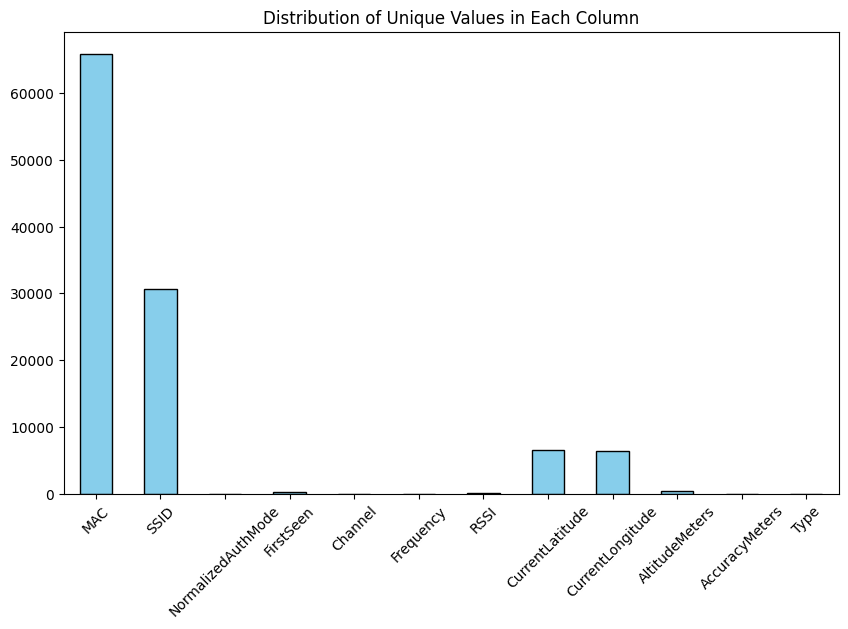

In [ ]:
post_unique_counts = df_final.nunique()
print (f'Distribution of Unique Values in Each Column \n\n{post_unique_counts}')
# Plotting the distribution of unique values
make_bar_chart(post_unique_counts,'Distribution of Unique Values in Each Column')



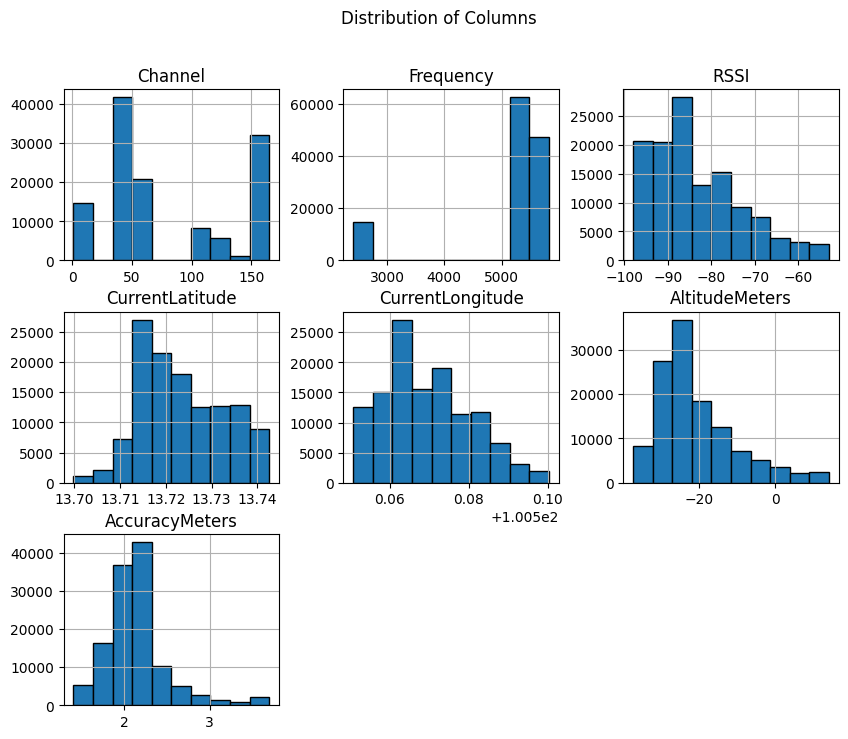

In [ ]:
# Plot histograms for numeric columns
df_final.hist(figsize=(10, 8), bins=10, edgecolor='black')
plt.suptitle('Distribution of Columns')
plt.show()

visualizations

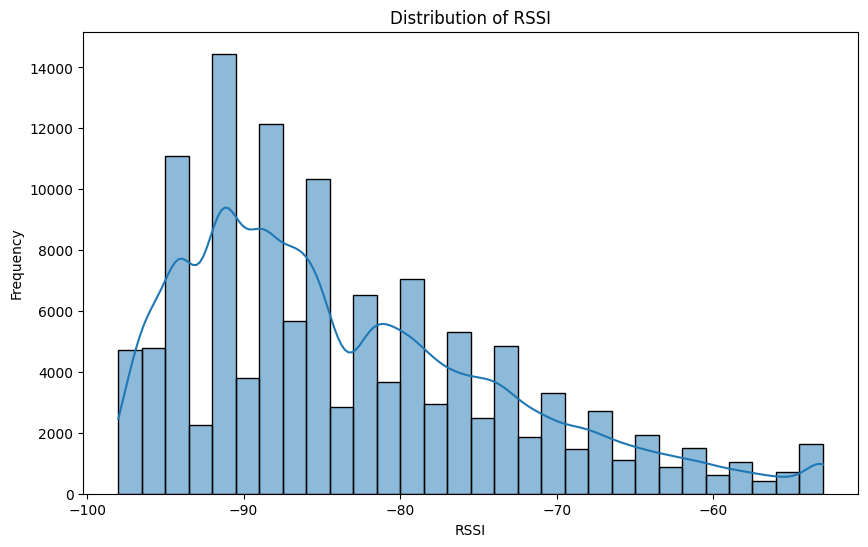

In [ ]:
#HISTOGRAM
#A Histogram can help visualize the distribution of signal strength across different rows.
plt.figure(figsize=(10, 6))
sns.histplot(df_final['RSSI'], bins=30, kde=True)
plt.title('Distribution of RSSI')
plt.xlabel('RSSI')
plt.ylabel('Frequency')
plt.show()

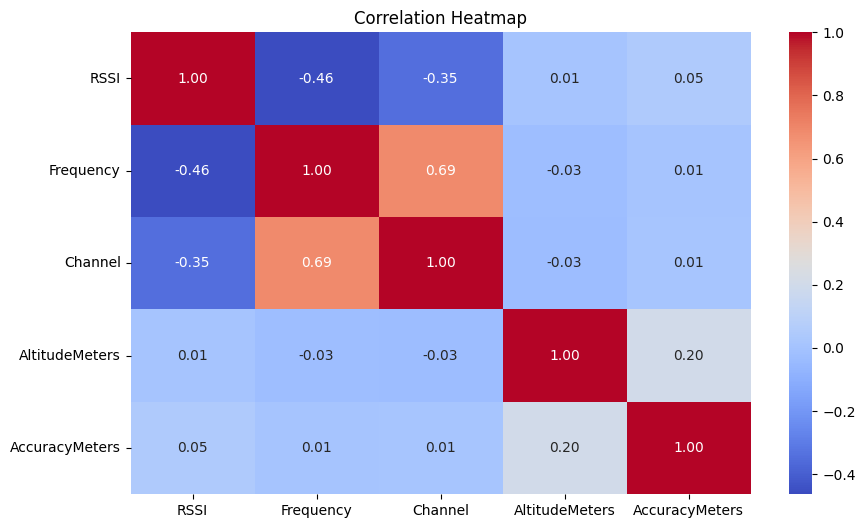

In [ ]:
# heatmap 
# shows the correlation between numerical columns like RSSI, Frequency, AltitudeMeters,

plt.figure(figsize=(10, 6))
correlation_matrix = df_final[['RSSI', 'Frequency', 'Channel', 'AltitudeMeters', 'AccuracyMeters']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


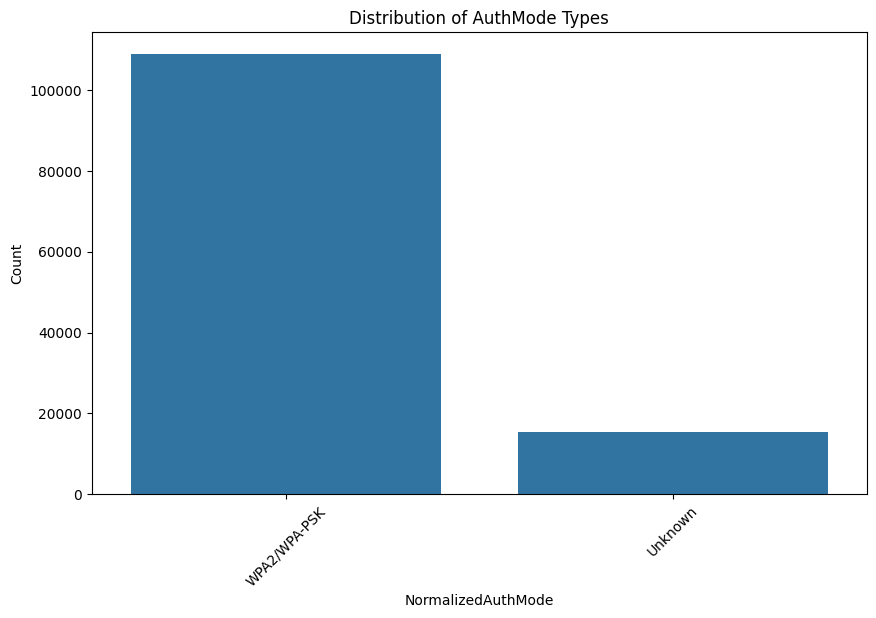

In [ ]:
# bar plot 
# helps in visualizing the count of different AuthMode types (e.g., WPA2, WPA3) within your dataset.
plt.figure(figsize=(10, 6))
sns.countplot(data=df_final, x='NormalizedAuthMode')
plt.title('Distribution of AuthMode Types')
plt.xlabel('NormalizedAuthMode')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


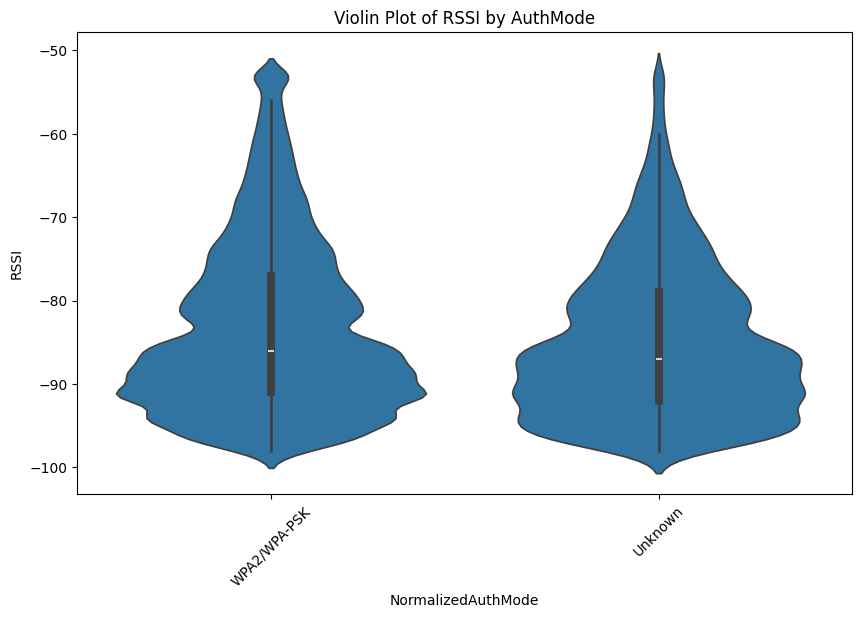

In [ ]:
#violin plot
# showing the distribution and density of the data for each NormalizedAuthMode.

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_final, x='NormalizedAuthMode', y='RSSI')
plt.title('Violin Plot of RSSI by AuthMode')
plt.xlabel('NormalizedAuthMode')
plt.ylabel('RSSI')
plt.xticks(rotation=45)
plt.show()

In [ ]:


# Create base map
m = folium.Map(location=[df_final['CurrentLatitude'].mean(), df_final['CurrentLongitude'].mean()], zoom_start=12)

# Prepare data for heatmap
heat_data = [[row['CurrentLatitude'], row['CurrentLongitude']] for index, row in df_final.iterrows()]

# Create heatmap
HeatMap(heat_data).add_to(m)

# Show the map
m
